# <center> Train XGBoost Classifier </center>

Now let's see if we can improve on our simple logistic regression model by using boosted decision trees. I will use the following blog post as a baseline for the hyperparameter tuning of my model: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/. The post mentioned above uses grid search for tuning while I have decided to use randomized search.

Loasing xgboost will throw a warning because the version I have installed seems to reference to a deprecated scikit module.

In [8]:
import xgboost as xgb
import pandas as pd
import numpy as np
from time import time
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss, accuracy_score
from capstone_project import utility

%matplotlib inline

Load the data:

In [9]:
file_directory = "../output/data/"

train_data = utility.load_pickle(file_directory, "train_features.pkl")
val_data = utility.load_pickle(file_directory, "val_features.pkl")
train_labels = utility.load_pickle(file_directory, "train_labels.pkl")
val_labels = utility.load_pickle(file_directory, "val_labels.pkl")

train_data = train_data[:100]
train_labels = train_labels[:100]

Define inital parameters for XGBoost Classifier:

In [10]:
learning_rate = 0.2
n_estimators = 1000
max_depth = 10
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
objective = "binary:logistic"
nthread = 4
scale_pos_weight = 1
reg_alpha=0
seed = 3453

Find best number of estimators for a high learnng rate:


Best number of iterations: 4

   test-logloss-mean  test-logloss-std  train-logloss-mean  train-logloss-std
0           0.658026          0.029485            0.613770           0.009251
1           0.620967          0.045992            0.546282           0.009503
2           0.609966          0.053413            0.494025           0.011097
3           0.601447          0.062302            0.453653           0.010292

Model Report on full training set
Accuracy : 0.91
Logloss (Train): 0.445196456909


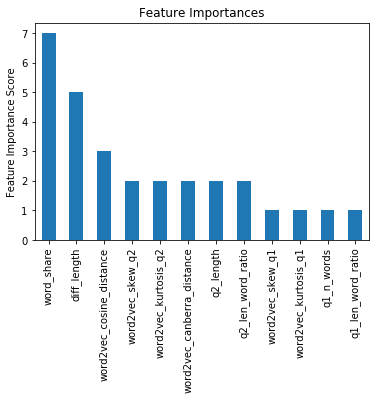

In [11]:
clf = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                         min_child_weight=min_child_weight, gamma=gamma, subsample=subsample,
                         colsample_bytree=colsample_bytree, objective=objective, nthread=nthread,
                         scale_pos_weight=scale_pos_weight, reg_alpha=reg_alpha, seed=seed)

plt = utility.xgb_fit_model(clf, train_data, train_labels)
plt.show()

In [12]:
n_estimators = 367

In [21]:
param_dist = {"max_depth": randint(6,16), #randint takes min and max values as parameters
              "min_child_weight": randint(1,6)}

n_iter_search = 10  # Number of searches in Randomized search

random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                                               max_depth=max_depth, min_child_weight=min_child_weight, 
                                                               gamma=gamma, subsample=subsample, 
                                                               colsample_bytree=colsample_bytree, objective=objective, 
                                                               nthread=nthread, scale_pos_weight=scale_pos_weight, 
                                                                reg_alpha=reg_alpha, seed=seed), 
                                 param_distributions = param_dist, n_iter=n_iter_search, 
                                 scoring='neg_log_loss', n_jobs=2, iid=False, cv=5, random_state=329)

print random_search
start = time()
random_search.fit(train_data, train_labels)
print "\nRandomizedSearchCV took {:.2f} minutes for {} candidates parameter settings.".format((time() - start)/60, n_iter_search)
utility.report(random_search.cv_results_)  

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=367, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3453, silent=True, subsample=0.8),
          fit_params={}, iid=False, n_iter=10, n_jobs=2,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917be6ad0>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917c39390>},
          pre_dispatch='2*n_jobs', random_state=329, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

RandomizedSearchCV took 0.02 minutes for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.666 (std: 0.132)
Parameters: {'max_depth': 7, 'min_child_weight': 5}

Mo

In [16]:
# Best model score 0.419
max_depth = 10
min_child_weight = 1

In [22]:
param_dist = {"gamma": uniform(0, 0.5)}

n_iter_search = 5  # Number of searches in Randomized search


random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                                               max_depth=max_depth, min_child_weight=min_child_weight, 
                                                               gamma=gamma, subsample=subsample, 
                                                               colsample_bytree=colsample_bytree, objective=objective, 
                                                               nthread=nthread, scale_pos_weight=scale_pos_weight, 
                                                                reg_alpha=reg_alpha, seed=seed), 
                                 param_distributions = param_dist, n_iter=n_iter_search, 
                                 scoring='neg_log_loss', n_jobs=2, iid=False, cv=5, random_state=329)

print random_search
start = time()
random_search.fit(train_data, train_labels)
print "\nRandomizedSearchCV took {:.2f} minutes for {} candidates parameter settings.".format((time() - start)/60, n_iter_search)
utility.report(random_search.cv_results_)  


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=367, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3453, silent=True, subsample=0.8),
          fit_params={}, iid=False, n_iter=5, n_jobs=2,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917b9ad50>},
          pre_dispatch='2*n_jobs', random_state=329, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

RandomizedSearchCV took 0.01 minutes for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.904 (std: 0.212)
Parameters: {'gamma': 0.42932935500396757}

Model with rank: 2
Mean validation score: -0.943 (std: 0.243)
Parameters: {'gamma': 0.2869118309443125}

Mode

In [23]:
# no Improvement visible keep gamma
gamma = 0

In [24]:
param_dist = {"subsample": uniform (0.5, 0.4),  # Uniform takes minimum value and range as parameters
              "colsample_bytree": uniform (0.5, 0.4)}

n_iter_search = 8  # Number of searches in Randomized search


random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                                               max_depth=max_depth, min_child_weight=min_child_weight, 
                                                               gamma=gamma, subsample=subsample, 
                                                               colsample_bytree=colsample_bytree, objective=objective, 
                                                               nthread=nthread, scale_pos_weight=scale_pos_weight, 
                                                                reg_alpha=reg_alpha, seed=seed), 
                                 param_distributions = param_dist, n_iter=n_iter_search, 
                                 scoring='neg_log_loss', n_jobs=2, iid=False, cv=5, random_state=329)

print random_search
start = time()
random_search.fit(train_data, train_labels)
print "\nRandomizedSearchCV took {:.2f} minutes for {} candidates parameter settings.".format((time() - start)/60, n_iter_search)
utility.report(random_search.cv_results_)  


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=367, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3453, silent=True, subsample=0.8),
          fit_params={}, iid=False, n_iter=8, n_jobs=2,
          param_distributions={'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917b9ac90>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917b9a210>},
          pre_dispatch='2*n_jobs', random_state=329, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

RandomizedSearchCV took 0.01 minutes for 8 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.967 (std: 0.217)
Parameters: {'subsample': 0.59760345510988133, 'colsample

In [25]:
# loss is 0.417
subsample = 0.854 
colsample_bytree = 0.722

In [27]:
param_dist = { 'reg_alpha': uniform(0,100)} # Uniform takes minimum value and range as parameters
n_iter_search = 10  # Number of searches in Randomized search

random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                                               max_depth=max_depth, min_child_weight=min_child_weight, 
                                                               gamma=gamma, subsample=subsample, 
                                                               colsample_bytree=colsample_bytree, objective=objective, 
                                                               nthread=nthread, scale_pos_weight=scale_pos_weight, 
                                                                reg_alpha=reg_alpha, seed=seed), 
                                 param_distributions = param_dist, n_iter=n_iter_search, 
                                 scoring='neg_log_loss', n_jobs=2, iid=False, cv=5, random_state=329)

print random_search
start = time()
random_search.fit(train_data, train_labels)
print "\nRandomizedSearchCV took {:.2f} minutes for {} candidates parameter settings.".format((time() - start)/60, n_iter_search)
utility.report(random_search.cv_results_)  


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.722,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=367, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3453, silent=True, subsample=0.854),
          fit_params={}, iid=False, n_iter=10, n_jobs=2,
          param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa917c1c510>},
          pre_dispatch='2*n_jobs', random_state=329, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

RandomizedSearchCV took 0.02 minutes for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.610 (std: 0.033)
Parameters: {'reg_alpha': 7.0631346299201319}

Model with rank: 2
Mean validation score: -0.693 (std: 0.000)
Parameters: {'reg_alpha': 57.38236

In [28]:
#best model 0.415
reg_alpha = 0.782
learning_rate = 0.01
n_estimators = 50000

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.722,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=50000, nthread=4,
       objective='binary:logistic', reg_alpha=0.782, reg_lambda=1,
       scale_pos_weight=1, seed=3453, silent=True, subsample=0.854)

Best number of iterations: 174

     test-logloss-mean  test-logloss-std  train-logloss-mean  \
164           0.593545          0.071081            0.374156   
165           0.593561          0.071270            0.373110   
166           0.593625          0.071445            0.372152   
167           0.593420          0.071979            0.371281   
168           0.593223          0.072375            0.370328   
169           0.593031          0.072719            0.369387   
170           0.592661          0.072791            0.368503   
171           0.592830          0.073057            0.367510   
172           0.592580          0.073063 

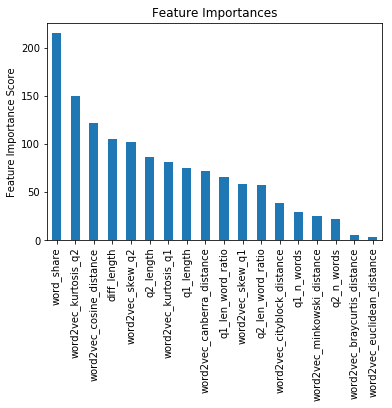

In [29]:
clf = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                         min_child_weight=min_child_weight, gamma=gamma, subsample=subsample,
                         colsample_bytree=colsample_bytree, objective=objective, nthread=nthread,
                         scale_pos_weight=scale_pos_weight, reg_alpha=reg_alpha, seed=seed)

print clf
start = time()
utility.xgb_fit_model(clf, train_data, train_labels)
print "\nXGB fitting took {:.2f} minutes.".format((time() - start)/60)


In [31]:
model_directory = "../output/models/"
prefix = "for_validation_"

utility.save_pickle(clf, model_directory, prefix+"xgboost.pkl") 

In [33]:
model_directory = "../output/models/"
clf = utility.load_pickle(model_directory, "for_validation_xgboost.pkl")

predictions= clf.predict_proba(val_data)[:, 1] 

In [34]:
loss = log_loss(val_labels, predictions)
acc = accuracy_score(val_labels, np.rint(predictions))

print "Validation scores for the xgboost classifier\n LogLoss: {:.4f}\n Accuracy: {:.2f} ".format(loss, acc)

Validation scores for the xgboost classifier
 LogLoss: 0.5325
 Accuracy: 0.69 


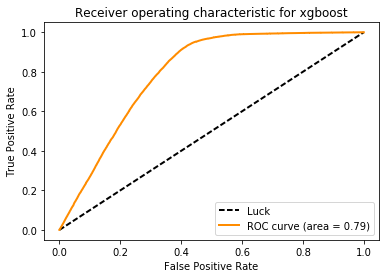

In [35]:
plt = utility.create_roc_plot(val_labels, predictions, "xgboost")
plt.savefig("../output/figures/xgboost_roc_plot.png")
plt.show()